# San Diego Traffic Collision Analysis

UCSD Datathon 2019  
By Nathan Tsai, Bernard Wong, and Sally Poon


**Contents**
* Introduction
* Imports
* Exploratory Data Analysis
* Data Cleaning
* Analysis
* Pacific Beach Case Study
* Conclusion and Insights

**Guidelines**

Impact:  How important/interesting is the question being asked?

Data Analysis and Visualization: Are the findings presented in an aesthetically pleasing and easy to understand manner? Is the data analysis rigorous and mathematically sound?

Creativity & Innovation: Are there advanced, creative modelling and analysis techniques being used? Are there non-orthodox analysis tools being used?

Presentation: How clearly are the findings presented? Have the ideas been articulated well?

Vision Future plans for the project? Is there a clear idea of how they would like to use their findings? 

## Introduction

Traffic is an incredibly large issue in California. According to a 2015 U.S. census, four of the top ten worst locations for commute (based on commute time) are located in California, which can lead to a plethora of other problems. As technology becomes more and more advanced and we have access to more and more data, opportunities arise for data-related problem solving, and the issue of traffic and collisions is no different.

With access to data regarding both traffic and collisions, we have a lot of power to help answer some questions that we may have. However, we needed to have a general understanding of what all the data is and what it actually represents. Our first steps involved the translation of the data into visuals so that we can identify general trends and ideas that help us both answer and formulate more questions.

## Imports

In [43]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
# Import datasets
data_dir = '../trafficdata'
collisions = pd.read_csv(os.path.join(data_dir, 'pd_collisions_datasd.csv'))
collisions_dict = pd.read_csv(os.path.join(data_dir, 'pd_collisions_dictionary_datasd.csv'))
traffic_counts = pd.read_csv(os.path.join(data_dir, 'traffic_counts_datasd.csv'))
traffic_dict = pd.read_csv(os.path.join(data_dir, 'traffic_counts_dictionary_datasd.csv'))

## Exploratory Data Analysis

### Collisions EDA

In [45]:
collisions_dict.drop(['Unnamed: 3'], axis=1).drop([16, 17], axis=0)

,Field,Description,Values
0,activityNumber,Collision report number,NaN
1,activityDate,Date/time of collision,Date / time in 24 hour format
2,beat,San Diego Police beat,see code list
3,StreetNo,"Street number of collision location, abstracte...",NaN
4,StreetDir,Direction of street in location,NaN
5,StreetName,Name of street,NaN
6,StreetType,Street type,NaN
7,CrossStDir,"Direction of cross street, if collision at int...",NaN
8,CrossStName,"Street name, if collision at intersection",NaN
9,CrossStType,"Street type, if collision at intersection",NaN


In [46]:
print(collisions.info())
collisions.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22708 entries, 0 to 22707
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   report_id          22708 non-null  object
 1   date_time          22708 non-null  object
 2   police_beat        22708 non-null  int64 
 3   street_no          22708 non-null  int64 
 4   street_dir         22708 non-null  object
 5   street_name        22708 non-null  object
 6   street_type        22706 non-null  object
 7   cross_st_dir       22708 non-null  object
 8   cross_st_name      22708 non-null  object
 9   cross_st_type      22701 non-null  object
 10  violation_section  22708 non-null  object
 11  violation_type     22708 non-null  object
 12  charge_desc        22708 non-null  object
 13  injured            22708 non-null  int64 
 14  killed             22708 non-null  int64 
 15  hit_run_lvl        10521 non-null  object
dtypes: int64(4), object(12)
memory usage: 2.

,report_id,date_time,police_beat,street_no,street_dir,street_name,street_type,cross_st_dir,cross_st_name,cross_st_type,violation_section,violation_type,charge_desc,injured,killed,hit_run_lvl
22703,19200884,2019-04-14 10:51:00,235,15500,,SAN PASQUAL VALLEY,ROAD,,,,22350,VC,UNSAFE SPEED (BASIC SPEED LAW) (I),1,0,NaN
22704,19200885,2019-04-14 10:53:18,315,9100,,FRIARS,ROAD,,,,22350,VC,UNSAFE SPEED (BASIC SPEED LAW) (I),0,0,MISDEMEANOR
22705,19200891,2019-04-14 16:08:00,243,7000,,MIRAMAR,ROAD,,,,21453A,VC,SIGNAL LIGHTS:CIRCULAR RED (I),1,0,NaN
22706,19200894,2019-04-14 18:03:00,116,1500,,MORENA,BOULEVARD,,,,23152(F),VC,DUI ALCOHOL/DRUG (M),1,0,NaN
22707,19200893,2019-04-14 19:41:00,521,800,,10TH,AVENUE,,,,22107,VC,TURNS:UNSAFE TURN AND/OR NO TURN SIGNAL (I),1,0,NaN


We notice many of the columns have missing data. The `hit_run_lvl` column is missing more than half of the values, but other columns like `street_dir`, `cross_st_dir`, `cross_st_name`, and `cross_st_type` are also missing values as many of the values are empty strings.

We also see many of the data types are objects/strings, which can be difficult to work with or impute.

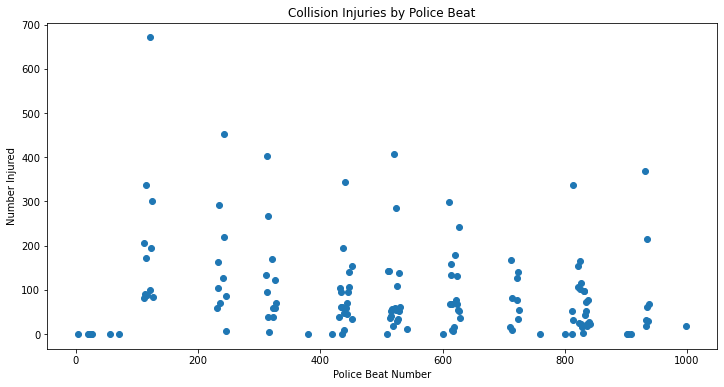

In [47]:
num_injured_by_beat = collisions.groupby('police_beat')[['injured']].agg('sum')
plt.figure(figsize=(12,6))
plt.scatter(x=num_injured_by_beat.index, y=num_injured_by_beat['injured'])
plt.title("Collision Injuries by Police Beat")
plt.ylabel('Number Injured')
plt.xlabel('Police Beat Number')
plt.show()

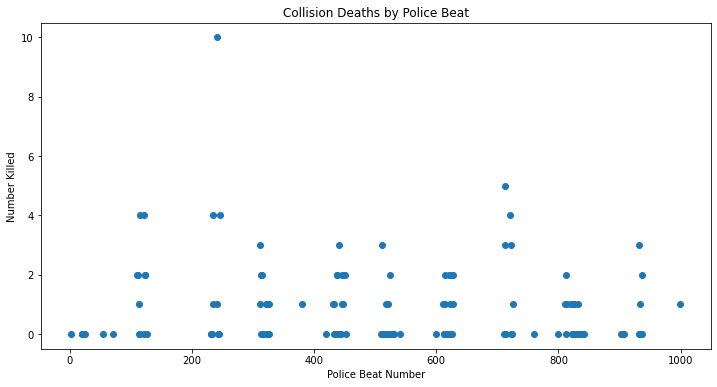

In [48]:
num_killed_by_beat = collisions.groupby('police_beat')[['killed']].agg('sum')
plt.figure(figsize=(12,6))
plt.scatter(x=num_killed_by_beat.index, y=num_killed_by_beat['killed'])
plt.title("Collision Deaths by Police Beat")
plt.ylabel('Number Killed')
plt.xlabel('Police Beat Number')
plt.show()

We notice there is one beat with nearly 700 injuries, which is significantly higher than the other police beats.

We notice there is one beat with 10 deaths, while the other beats are around 5 deaths or fewer.

We also notice the beat numbers are somewhat clustered, with one beat 999, which could probably be for naming purposes to better distinguish beats.

### Traffic Counts EDA

In [49]:
traffic_dict

,Field,Description
0,street_name,The vehicles were counted on this street
1,limits,The vehicles were counted between these cross ...
2,northbound_count,The 24 hour count of northbound vehicles
3,southbound_count,The 24 hour count of southbound vehicles
4,eastbound_count,The 24 hour count of eastbound vehicles
5,westbound_count,The 24 hour count of westbound vehicles
6,total_count,The 24 hour total of all directions of vehicle...
7,count_date,The vehicles were counted on this date


In [50]:
print(traffic_counts.info())
traffic_counts.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11659 entries, 0 to 11658
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                11659 non-null  object 
 1   street_name       11659 non-null  object 
 2   limits            11659 non-null  object 
 3   all_count         11637 non-null  object 
 4   northbound_count  5770 non-null   object 
 5   southbound_count  5796 non-null   float64
 6   eastbound_count   5384 non-null   float64
 7   westbound_count   5368 non-null   float64
 8   total_count       11659 non-null  int64  
 9   file_no           11659 non-null  object 
 10  count_date        11659 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 1002.1+ KB
None


,id,street_name,limits,all_count,northbound_count,southbound_count,eastbound_count,westbound_count,total_count,file_no,count_date
0,01AV018207,01 AV,A ST - ASH ST,,18010,NaN,NaN,NaN,18010,0182-07,2007-03-13 00:00:00
1,01AV015210,01 AV,A ST - ASH ST,,20060,NaN,NaN,NaN,20060,0152-10,2010-03-18 00:00:00
2,01AV018213,01 AV,A ST - ASH ST,,19597,NaN,NaN,NaN,19597,0182-13,2013-03-12 00:00:00
3,01AV088812,01 AV,ASH ST - BEECH ST,,2298,NaN,NaN,NaN,2298,0888-12,2012-12-11 00:00:00
4,01AV068711,01 AV,B ST - A ST,,15625,NaN,NaN,NaN,15625,0687-11,2011-09-01 00:00:00


In [51]:
dates = traffic_counts[['count_date']]
print(dates.min())
print(dates.max())

count_date    2005-01-05 00:00:00
dtype: object
count_date    2019-03-28 00:00:00
dtype: object


We see that many of the `_count` columns have missing values of directional traffic counts. We also notice that the dates span from 2005 to 2019 and not all streets may have the same number of measurements.

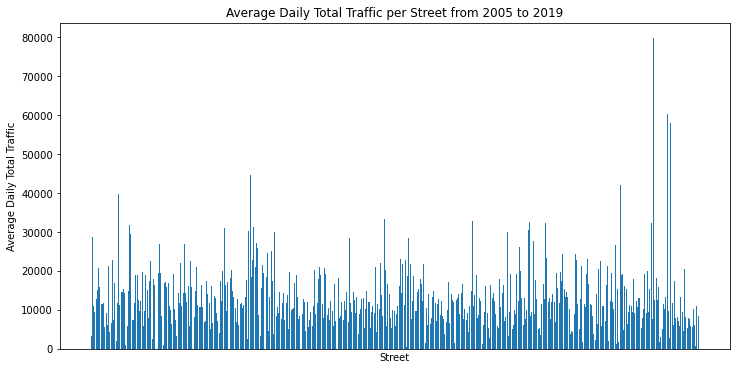

In [52]:
total_traffic_by_street = traffic_counts.groupby('count_date')[['total_count']].agg('mean')
plt.figure(figsize=(12,6))
plt.bar(total_traffic_by_street.index, total_traffic_by_street['total_count'])
plt.title("Average Daily Total Traffic per Street from 2005 to 2019")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylabel('Average Daily Total Traffic')
plt.xlabel('Street')
plt.show()

We can see there are some streets with over 50,000 average total vehicles a day, with one street with almost 80,000 average total vehicles per day. Because averages are affected by outliers, it may be interesting to see if these higher numbers are the result of a few days being significantly higher, which could be an error in measurement or calculation.

## Data Cleaning

<h3> Cleaning Collisions </h3>

In [53]:
# Drop unnecessary columns
cl_collisions = collisions.drop('report_id', axis=1)

In [54]:
# Clean hit/run level, fill NaN with Neither
cl_collisions['hit_run_lvl'].fillna('NEITHER', inplace=True)

In [55]:
# Clean date time, convert to datetime object
cl_collisions['date_time'] = cl_collisions['date_time'].apply(pd.to_datetime)

In [56]:
# Clean null street types
# cl_collisions.loc[cl_collisions.street_type.isnull()]
cl_collisions['street_type'] = cl_collisions.street_type.fillna("")

In [57]:
cl_collisions.police_beat.value_counts().sort_index().tail()

934    313
935     78
936     50
937     79
999     45
Name: police_beat, dtype: int64

Looking at the police beats, we see that the beat number jumps from 937 to 999. Why does it jump?
Also, there are only 45 collisions with the beat number of 999.

A quick Google search shows us that Beat 999 is a label for "Out of County" collisions, so we decide to drop those entries as 45 collisions of 22,708 collisions is a small amount of data to drop.

In [58]:
cl_collisions = cl_collisions[cl_collisions['police_beat'] != 999]

<h3>Cleaning Traffic Counts</h3>

In [59]:
# Drop unnecessary columns
cl_traffic = traffic_counts.drop(['id', 'count_date', 'file_no'], axis=1)

In [60]:
cl_traffic.dtypes

street_name          object
limits               object
all_count            object
northbound_count     object
southbound_count    float64
eastbound_count     float64
westbound_count     float64
total_count           int64
dtype: object

We see the count columns are all different types, so we can fill missing values, coerce non-numeric values, to cast the count columns to the same dtype.

In [61]:
# Helper function to clean count columns
def clean_counts(df):
    for col in df:
        if col.endswith('_count'):
            # Convert to numeric values, coerce and fill with 0 if error
            df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)
    return df

In [62]:
# Clean the traffic count columns, convert types
cl_traffic = clean_counts(cl_traffic)
cl_traffic.dtypes

street_name         object
limits              object
all_count            int32
northbound_count     int32
southbound_count     int32
eastbound_count      int32
westbound_count      int32
total_count          int32
dtype: object

## Analysis

### Which beats have more injuries or collisions?

<Figure size 864x432 with 0 Axes>

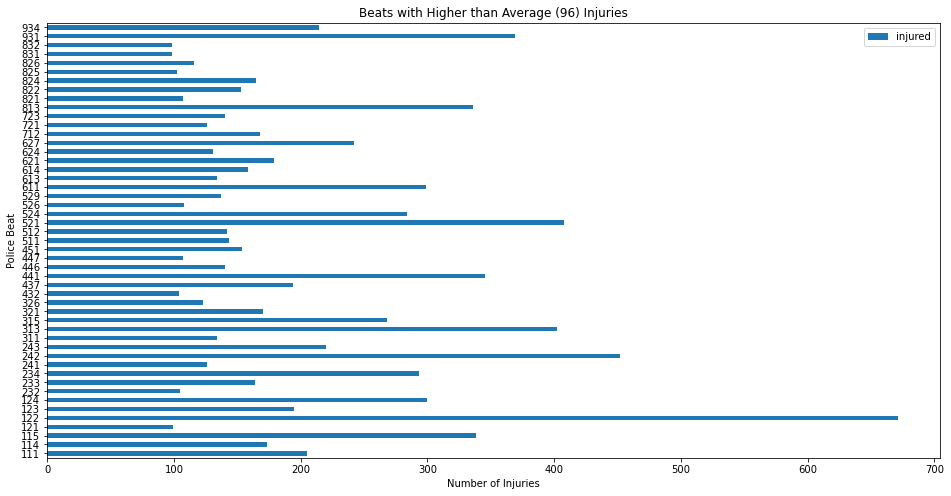

In [63]:
inj_beats = cl_collisions.groupby('police_beat')[['injured']].agg('sum')
mean_inj = inj_beats['injured'].mean()
inj_beats_higher = inj_beats[inj_beats['injured'] > mean_inj]
plt.figure(figsize=(12,6))
inj_beats_higher.plot.barh(figsize=(16, 8))

plt.title(f'Beats with Higher than Average ({int(mean_inj + 0.5)}) Injuries') # round up
plt.ylabel('Police Beat')
plt.xlabel('Number of Injuries')
plt.show()

We can see that Beat 122 has significantly more collision injuries than the other police beats.

<Figure size 864x432 with 0 Axes>

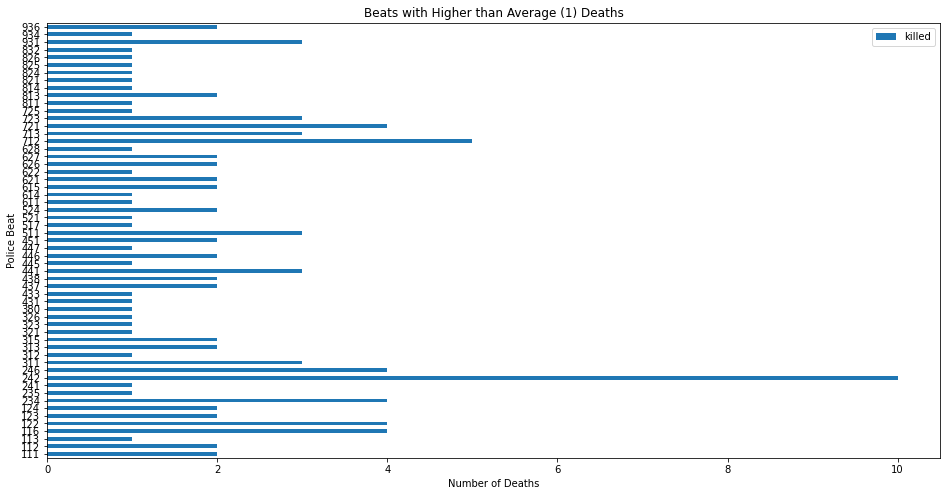

In [64]:
kill_beats = cl_collisions.groupby('police_beat')[['killed']].agg('sum')
mean_kill = kill_beats['killed'].mean()
kill_beats_higher = kill_beats[kill_beats['killed'] > mean_kill]
plt.figure(figsize=(12,6))
kill_beats_higher.plot.barh(figsize=(16, 8))

plt.title(f'Beats with Higher than Average ({int(mean_kill + 0.5)}) Deaths') # round up
plt.ylabel('Police Beat')
plt.xlabel('Number of Deaths')
plt.show()

We can see that Beat 242 has over two times the deaths as deaths of other police beats.

### Which street type is the most dangerous?

We can define dangerous as the sum of the number of injuries and the number of deaths.

In [65]:
cl_collisions['street_type'].unique()

array([' ', 'DRIVE', 'STREET', 'TRAIL', 'AVENUE', 'PLACE', 'COURT',
       'ROAD', 'BOULEVARD', 'PARKWAY', 'WAY', 'COVE', 'CIRCLE', 'LANE',
       'HIGHWAY', 'TERRACE', 'PLAZA', 'MALL', 'ROW', 'POINT', 'WALK',
       'PASEO', 'SQUARE', 'RAMP', 'DRIVEWAY', 'KNOLLS', '', 'LIGHTS'],
      dtype=object)

We want to ignore the missing street types before counting injuries and deaths.

In [66]:
danger_st = cl_collisions[~cl_collisions['street_type'].isin(('', ' '))].groupby('street_type').sum()[['injured', 'killed']]
danger_st['total'] = danger_st['injured'] + danger_st['killed']
danger_st.sort_values('total', ascending=False).head(10)

,injured,killed,total
street_type,,,
AVENUE,3322,24,3346
STREET,3037,25,3062
ROAD,2320,19,2339
BOULEVARD,2019,20,2039
DRIVE,1453,10,1463
PARKWAY,189,2,191
WAY,126,2,128
HIGHWAY,78,0,78
PLACE,51,0,51


In [67]:
# least dangerous (deaths + injuries)
print('Least Dangerous:', danger_st[danger_st['total'] == danger_st['total'].min()].index.to_list())

# most injuries
print('Most Injuries:', danger_st[danger_st['injured'] == danger_st['injured'].max()].index.to_list())

# most deaths
print('Most Deaths:', danger_st[danger_st['killed'] == danger_st['killed'].max()].index.to_list())

# most dangerous (deaths + injuries)
print('Most Dangerous:', danger_st[danger_st['total'] == danger_st['total'].max()].index.to_list())

Least Dangerous: ['COVE', 'KNOLLS', 'PASEO', 'TRAIL']
Most Injuries: ['AVENUE']
Most Deaths: ['STREET']
Most Dangerous: ['AVENUE']


The most dangerous street types are "Street" and "Avenue", which makes sense as there are more cars and more lanes on these roadways.

### What hour of day results in the most collisions?

In [68]:
cl_collisions['hour_of_day'] = cl_collisions['date_time'].apply(lambda x: x.hour)

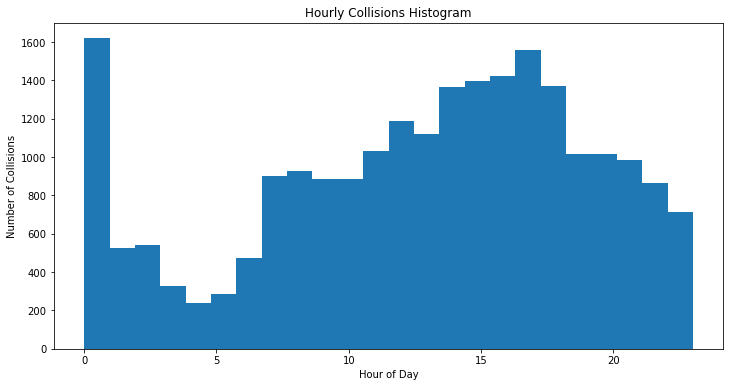

In [69]:
cl_collisions.hour_of_day.plot.hist(title="Hourly Collisions Histogram", bins=24, figsize=(12,6))
plt.xlabel('Hour of Day')
plt.ylabel('Number of Collisions')
plt.show()

We can see that collisions generally happen in the afternoon around 3pm or 4pm. There is also a large number of collisions that happens between midnight and 1am.

### Why are there more collisions between midnight and 1AM?

In [70]:
midnight_hour = cl_collisions[cl_collisions['hour_of_day'] < 1]
midnight_hour.shape[0]

1620

In [71]:
midnight_hour.charge_desc.value_counts().head()

MISCELLANEOUS HAZARDOUS VIOLATIONS OF THE VEHICLE CODE      760
TURNING MOVEMENTS AND REQUIRED SIGNALS                      513
VIOLATION OF BASIC SPEED LAW SPEED UNSAFE FOR CONDITIONS     90
STARTING PARKED VEHICLES OR BACKING                          82
RED OR STOPVEHICLES STOP AT LIMIT LINE                       37
Name: charge_desc, dtype: int64

In [72]:
midnight_hour.hit_run_lvl.value_counts()

MISDEMEANOR    1275
NEITHER         335
FELONY           10
Name: hit_run_lvl, dtype: int64

Of the 1,620 collisions that happened between midnight and 1am, most of them were due to misdemeanor offenses of either "Miscellaneous Hazardous Violations of the Vehicle Code" or "Turning Movements and Required Signals". The increase in collisions could be due to more late night activity, decreased visibility at nighttime, drivers being more fatigued, or other factors that may increase collisions.

### What day of the week results in most collisions?

In [73]:
cl_collisions['day_of_week'] = cl_collisions['date_time'].dt.day_name()
cl_collisions['day_of_week'].value_counts()

Friday       3551
Saturday     3377
Thursday     3284
Wednesday    3220
Tuesday      3101
Sunday       3099
Monday       3031
Name: day_of_week, dtype: int64

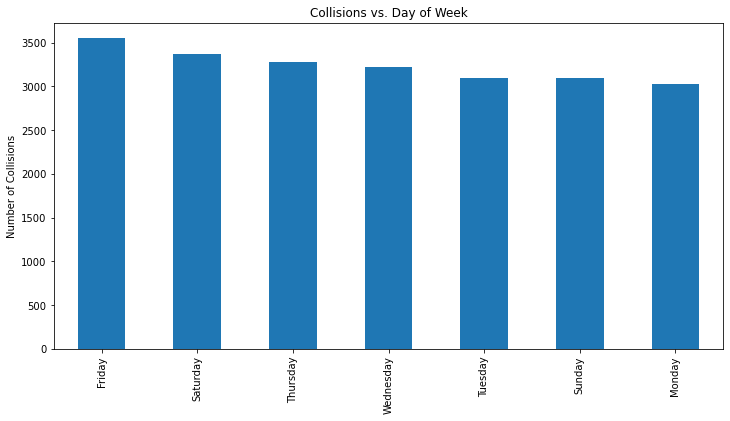

In [74]:
cl_collisions.day_of_week.value_counts().plot(kind='bar', title='Collisions vs. Day of Week', figsize=(12, 6))
plt.ylabel('Number of Collisions')
plt.show()

We can see that collisions generally happen similarly often across all days of the week, with the most collisions happening on Friday.

## Pacific Beach (Beat 122) Case Study

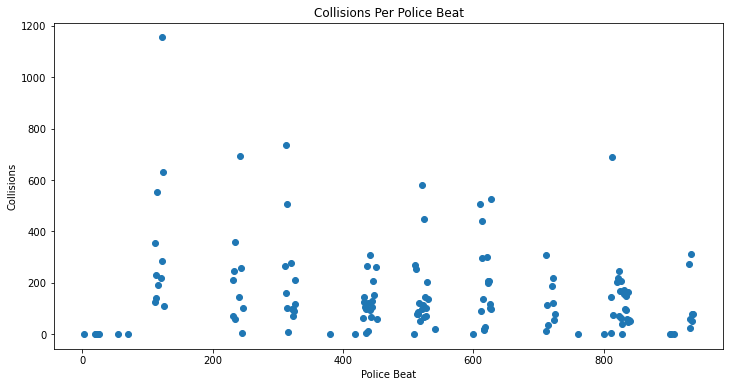

In [75]:
beat_collisions = cl_collisions.groupby('police_beat')[['police_beat']].agg(num_collisions=('police_beat', 'count'))
plt.figure(figsize=(12, 6))
plt.scatter(x=beat_collisions.index, y=beat_collisions['num_collisions'])
plt.title('Collisions Per Police Beat')
plt.xlabel('Police Beat')
plt.ylabel('Collisions')
plt.show()
# plt.savefig('colls_per_beat.png')

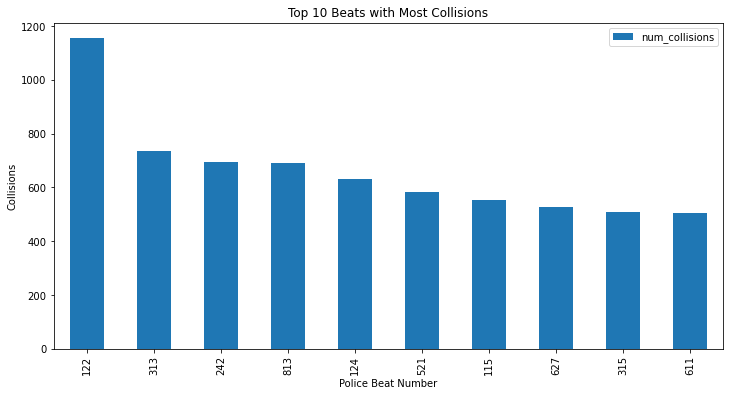

In [76]:
top_10_beats = beat_collisions.loc[beat_collisions['num_collisions'] > 450].sort_values('num_collisions', ascending=False)
top_10_beats.plot(kind='bar', title="Top 10 Beats with Most Collisions", figsize=(12, 6))
plt.xlabel("Police Beat Number")
plt.ylabel("Collisions")
plt.show()
# plt.savefig("top10beats.png")

We can see that Beat 122, or Pacific Beach, has significantly more collisions than other police beats. So let's explore why so many collisions happen in Pacific Beach.

In [77]:
pb_collisions = cl_collisions[cl_collisions['police_beat'] == 122].copy()

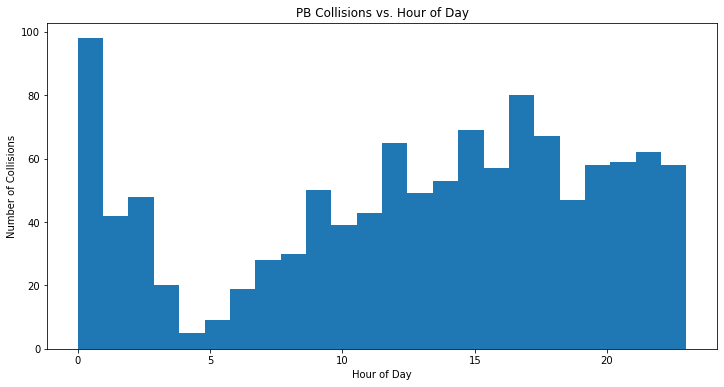

In [78]:
# Collisions in PB per hour of day
pb_collisions.hour_of_day.plot(kind='hist', title="PB Collisions vs. Hour of Day", bins=24, figsize=(12, 6))
plt.xlabel('Hour of Day')
plt.ylabel('Number of Collisions')
plt.show()
# plt.savefig('pbcollisions_per_hour.png')

Most of the collisions in Pacific Beach happen around midnight.

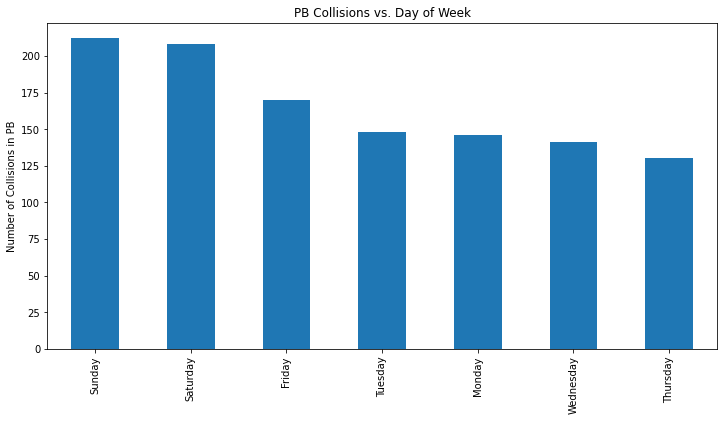

In [79]:
pb_collisions.day_of_week.value_counts().plot(kind='bar', title='PB Collisions vs. Day of Week', figsize=(12, 6))
plt.ylabel('Number of Collisions in PB')
plt.show()

Most of the collisions in Pacific Beach happen on the weekend.

## Hypothesis Testing

**Question:** Due to having the highest number of collisions, does Pacific Beach (Beat 122) have a significantly higher average of combined injuries and deaths than other beats, which do not have as many collisions?


**Null Hypothesis:**: Collisions in Pacific Beach (Beat 122) will not have a significantly higher average of combined injuries and deaths than the average combined injuries and deaths of collisions in the other beats of San Diego.


**Alternative Hypothesis:** Collisions in Pacific Beach (Beat 122) have higher averages of combined injuries and deaths than collisions in other beats of San Diego.

**Test Statistic:** Average Total Hurt, defined as the average of the sum of the number of injured and killed for each collision in the beat.

In [80]:
cl_collisions['total_hurt'] = cl_collisions['injured'] + cl_collisions['killed']
pb_collisions['total_hurt'] = pb_collisions['injured'] + pb_collisions['killed']

In [81]:
# Mean total hurt in PB, beat 122
observed_avg_hurt = pb_collisions[['total_hurt']].mean()[0]
observed_avg_hurt

0.5844155844155844

We first calculate the observed test statistic (average total hurt) for Pacific Beach.

In [82]:
averages = []
num_samples = 50000
for i in np.arange(num_samples):
    random_sample = cl_collisions[['total_hurt']].sample((pb_collisions.shape[0]), replace=False)
    new_average = np.mean(random_sample['total_hurt'])
    averages.append(new_average)
    
averages = np.array(averages)  

Then, we use bootstrapping to calculate the test statistic for 50,000 random samples that consist of the same number of collisions.

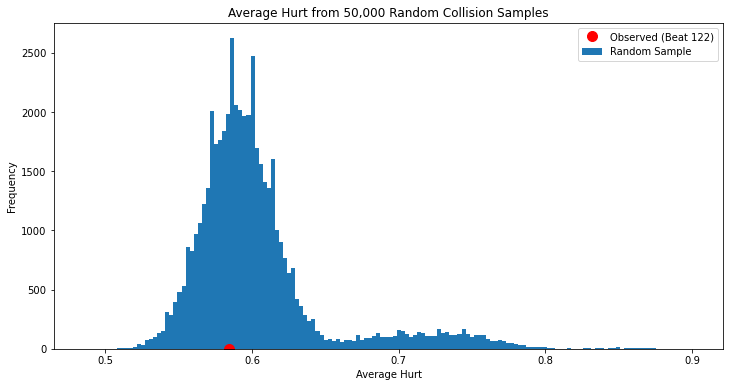

In [83]:
plt.figure(figsize=(12, 6))
pd.Series(averages, name='Average').plot(
    kind='hist', 
#     bins=cl_collisions['police_beat'].nunique(),
    bins=150,
    label='Random Sample'
)
# plt.scatter(observed_avg_hurt, 0, color='red', s=40)
plt.plot(observed_avg_hurt, 0, 'ro', markersize=10, label='Observed (Beat 122)')
plt.title('Average Hurt from 50,000 Random Collision Samples')
plt.xlabel("Average Hurt")
plt.ylabel("Frequency")
plt.legend()
plt.show()
# plt.savefig("avghurtsampled.png")

Graphing the samples, we can see that the average number of hurt people from collisions in Pacific Beach is actually pretty common, despite the fact Pacific Beach has more collisions.

In [84]:
p_value = np.count_nonzero(averages >= observed_avg_hurt) / num_samples
p_value

0.64768

Because the P-value of the hypothesis test is greater than 0.05, we accept the null hypothesis that collisions in Pacific Beach (Beat 122) do not have a significantly higher average of combined injuries and deaths than the average combined injuries and deaths of collisions in the other beats of San Diego.

From this result, it would be reasonable to think that a high amount of collisions does not necessarily mean that more people will be injured or killed on average.

## Conclusion and Insights

Based on our hypothesis test, we can conclude that just because an area has the most collisions, it doesn’t necessarily mean that area is specifically dangerous, in terms of collision-related deaths and injuries. But our analysis and hypothesis test still leaves some questions unanswered, and even leads to other questions. What is the cause of the large number of collisions in Pacific Beach that are mostly injury and death free?

Seeing that most of the collisions happen on the weekend and around midnight, we can see that the collisions in Pacific Beach could be due to the large amount of activity as Pacific Beach is a popular weekend destination for nightlife and recreation.

There were also many issues with the data that would ideally get resolved if we had the opportunity to analyze this data in the future. There were multiple areas in the different data sets, such as missing data, rounded off data (times and dates being rounded), and a variety of other messy data inputs. While we considered these different things and in general these were relatively negligible (due to our large dataset), it would be interesting to determine why these certain areas or data points were missing. We also felt that the traffic data didn’t provide enough data regarding each of the roads, as it would only have data on a few roads for each day (most likely due to a specific definition of traffic or a specific threshold of number of cars). If data could be collected on the total number of cars on each road per day, this could significantly help the traffic collision analysis.

From our observation of the large number of collisions in Pacific Beach without injuries or deaths, we can suggest the city set up some methods for increased driving awareness to address the main causes like turning signal or other miscellaneous vehicle violations.

Given our identification of the most impacted traffic regions in San Diego through looking at traffic collision data over the past 4 years, we can suggest drivers and businesses optimize their routes to avoid these areas and roads with around 50% more collisions for safer and more efficient commutes.

Overall, while we’ve taken a large step in analyzing this data, there’s still much to explore. Traffic will always be a large part of transportation, but with the strength of Data Science, large strides can be made to make traffic a thing of the past.